In [1]:
from collections import deque
import time
from typing import Any
import matplotlib.pyplot as plt

from PA1_test import testStack, testLinkedListStack, testTime

In [2]:
%load_ext memory_profiler

In [3]:
# Implementing Stacks using Arrays 

class ArrayStack:
    
    def __init__(self, constantSize:int = 1000) -> None:
        """
        Construct a Stack ADT based on an Array, which increases with Constant size
        whenever the stack is filled.

        Arguments:
            constantSize: int -> The constantSize number by which the array must increase when full.
                Default: 10
        """
        self.constantSize =  constantSize
        self.pointer = -1
        self.stack = ['GARBAGE_VALUE'] * self.constantSize
        self.stackSize = constantSize

    def push(self, element: Any) -> None:
        """
        Push the `element` into the top of the stack. Here it append at the end of Array

        Arguments:
            element: -> Any Elements which needs to be pushed on top of stack.
        """
        # If stack is Full, Increase size
        if self.pointer == self.stackSize-1:
            self._resize()
        
        # Move the pointer to new top position and replace garbage value with element.
        self.pointer += 1
        self.stack[self.pointer] = element

    def pop(self) -> Any:
        """
        Pop the Top element from the Stack and Returns it.
        If the Stack is Empty it returns None

        Returns:
            element: Any|None -> Return the top element of the stack, returns None if empty stack.
        """
        if self.isEmpty():
            return
        popped_val = self.stack[self.pointer]
        self.stack[self.pointer] = 'GARBAGE_VALUE'
        self.pointer -= 1
        return popped_val

    def size(self) -> int:
        """
        Return the size of the stack (NOT THE ARRAY SIZE)

        returns:
            pointer+1 : int -> The index_pointer+1 at which top element resides is the size of stack
        """
        return self.pointer+1

    def _resize(self) -> None:
        """
        Resizes the array, by creating a new array of size old_array + constant_size, 
        copying all the elements of old array.
        Changes the stack in-place.
        """
        # Copy the Old Stack All Elements, Increase the size by `constantSize`
        self.stack = self.stack + [None] * self.constantSize
        self.stackSize += self.constantSize

    def top(self) -> Any:
        """
        Returns the top most element of the stack. DOES NOT remove the top
        element, just return the value of top element

        Returns:
            top_elements: Any -> The top element of the stack, if stack is empty returns None
        """
        if self.isEmpty():
            return
        return self.stack[self.pointer]

    def isEmpty(self) -> bool:
        """
        Return True if the stack is empty, else returns False
        This is performed by seeing the index_pointer value, if index_pointer is -1
        it means that there are no elements in the stack.
        """
        return self.pointer == -1

    def printIsEmpty(self) -> None:
        """
        Prints the empty status of stack.
        """
        print("\nStack is Empty\n") if self.isEmpty() else print("\nStack is not Empty\n")


    def printStack(self) -> None:
        """
        Print the Stack
        """
        print(self.stack)

In [4]:
testStack(ArrayStack)

Test Cases Passed


In [5]:
# Implementing Stack using Array.
# Double the Size of Array, when the stack is Full

class DoublingArrayStack(ArrayStack):
    
    def __init__(self):
        super().__init__()
        
    def _resize(self) -> None:
        """
        Resizes the array, by creating a new array of size old_array + constant_size, 
        copying all the elements of old array.
        Changes the stack in-place.
        """
        # Copy the Old Stack All Elements, Double the size of Stack
        self.stack = self.stack + ['GARBAGE_VALUE'] * (self.pointer+1)
        self.stackSize += (self.pointer+1)

In [6]:
testStack(DoublingArrayStack)

Test Cases Passed


In [7]:
# Implementing Stacks Linked Lists

# Node class for the individual nodes
class Node:

    def __init__(self, data: Any):
        self.data = data
        self.next = None
    
    def __repr__(self):
        return f"(Data:{self.data}->{str(self.next)})"
 

# Manager class to link the nodes and manage the overall list
class LinkedListStack:
    def __init__(self, Node=Node):
        """
        Construct a Stack ADT based on a Linked List.

        Arguments:
            Node: Node -> The Node Class which is used as a Linked List Node
        """
        self.Node = Node
        self.head = None
        self.stackSize = 0

    def push(self, data: Any) -> None:
        """
        Push the `data` into the top of the stack.
        Create a node with `data` and add it to head of
        Linked List

        Arguments:
            data: -> Any Elements which needs to be pushed on top of stack.
        """
        element = self.Node(data)
        element.next = self.head
        self.head = element
        self.stackSize += 1

    def pop(self) -> Any:
        """
        Pop the Top element from the Stack and Returns it.
        If the Stack is Empty it returns None

        Returns:
            data: Any|None -> Return the top element of the stack, returns None if empty stack.
        """
        if self.isEmpty():
            return
        popped_val = self.head.data
        self.head = self.head.next
        self.stackSize -= 1

        return popped_val

    def size(self) -> int:
        """
        Return the size of the stack

        returns:
            stackSize : int -> The stackSize counter which keeps track of number of nodes created and deleted
        """
        return self.stackSize

    def top(self) -> Any:
        """
        Returns the top most element of the stack. DOES NOT remove the top
        element, just return the value of top element

        Returns:
            top_elements: Any -> The top element of the stack, if stack is empty returns None
        """
        if self.isEmpty():
            return
        return self.head.data

    def isEmpty(self) -> bool:
        """
        Return True if the stack is empty, else returns False
        This is performed by checking the stackSize, if stackSize is 0,
        return True else False.
        """
        return not bool(self.stackSize)

    def printIsEmpty(self) -> None:
        """
        Prints the empty status of stack.
        """
        print("\nStack is Empty\n") if self.isEmpty() else print(
            "\nStack is not Empty\n"
        )

    def reverseList(self) -> None:
        """
        Reverse the Linked List in place.
        Where the pointers for all nodes are reversed.
        """
        p1 = None
        p2 = self.head
        while p2 is not None:
            # Pointing to Next Node
            temp = p2.next
            # Making Next Node Point to Previous
            p2.next = p1
            # Moving To Next Iteration
            p1 = p2
            p2 = temp

        self.head = p1

    def printStack(self):
        """
        Print the Stack
        """
        return self.head

In [8]:
a = LinkedListStack()
a.push(10)
a.push(13)
a.push(15)
a.printStack()

(Data:15->(Data:13->(Data:10->None)))

In [9]:
testStack(LinkedListStack)

Test Cases Passed


In [10]:
testLinkedListStack(LinkedListStack)

Linked List Specific Test Cases Passed


In [11]:
class DequeStack(deque):
    def __init__(self):
        """
        Wrapper Class for Stack built on top of Deque.
        """  
        super().__init__()
        self.push = self.append
    
    def isEmpty(self):
        """
        Return True if the stack is empty, else returns False
        This is performed by checking the length. If length is 0
        return True else False.
        """
        return not bool(self.__len__())

    def pop(self):
        """
        Pop the Top element from the Stack and Returns it.
        If the Stack is Empty it returns None

        Returns:
            data: Any|None -> Return the top element of the stack, returns None if empty stack.
        """
        if self.isEmpty():
            return
        return super().pop()

    def size(self):
        """
        Return the size of the stack

        returns:
            __len__ : int -> Returns the length function of the Deque
        """
        return self.__len__()

    
    def top(self):
        """
        Returns the top most element of the stack. DOES NOT remove the top
        element, just return the value of top element

        Returns:
            top_elements: Any -> The top element of the stack, if stack is empty returns None
        """
        if self.isEmpty():
            return
        popped_val = super().pop()
        super().append(popped_val)
        return popped_val


In [12]:
testStack(DequeStack)

Test Cases Passed


In [58]:
def test(epochs, iterations):
    l1 = testTime(ArrayStack, epochs, iterations)
    l2 = testTime(DoublingArrayStack, epochs, iterations)
    l3 = testTime(LinkedListStack, epochs, iterations)
    l4 = testTime(DequeStack, epochs, iterations)

    f, (ax1) = plt.subplots(1,1, sharex=True, sharey=False, figsize=(8,8))

    # plt.figure(figsize = (12,20))
    
    ax1.plot(l1)
    ax1.plot(l2)
    ax1.plot(l3)
    ax1.plot(l4)
    ax1.legend(['Array Constant Increase Stack', 'Array Double Increase Stack', 'Linked List Stack', 'Inbuilt Deque Stack'], loc="upper left")
    ax1.set_ylabel('Time in Seconds')

    # ax2.plot(l2)
    # ax2.plot(l3)
    # ax2.plot(l4)
    # ax2.legend(['Array Double Increase Stack', 'Linked List Stack', 'Inbuilt Deque Stack'], loc="upper left")
    # ax1.set_ylabel('Time in Seconds')

    plt.xlabel('Number of Pushes (x1000)')
    plt.tight_layout()

    plt.show()

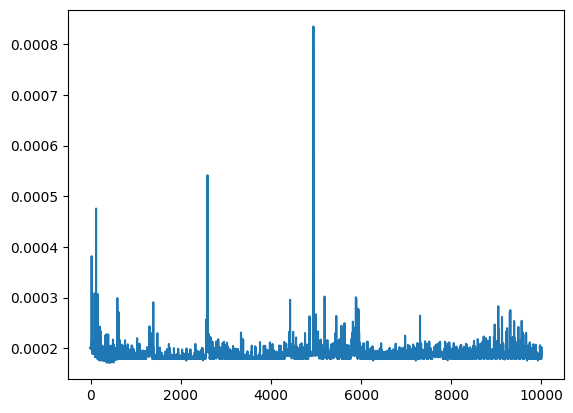

In [68]:
b = []
for _ in range(10000):
    a = time.perf_counter()
    for _ in range(1000):
        Node(10)
    b.append(time.perf_counter() - a)
plt.plot(b)

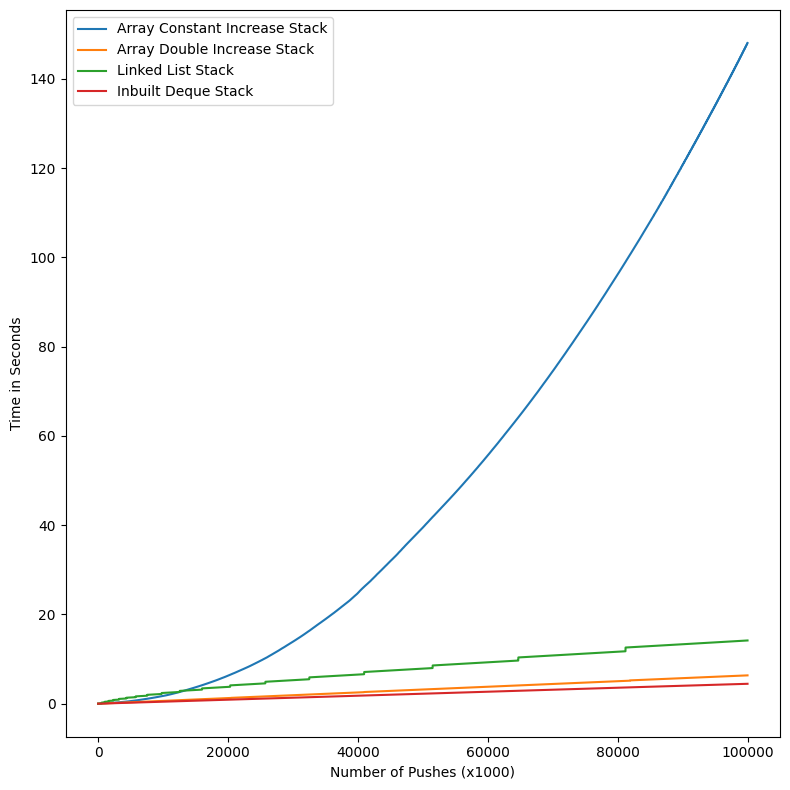

In [66]:
test(100_000, 100)